In [1]:
import pickle
import pandas as pd
from clustering import *
from objects import *

In [2]:
with open("clustering.normal.pickle", "rb") as log:
    kmeans_normal = pickle.load(log)

with open("clustering.discrete.pickle", "rb") as log:
    kmeans_discrete = pickle.load(log)

In [3]:
entry_normal = kmeans_normal["Self-reported satisfaction - AVG Monthly hours"]
entry_discrete = kmeans_discrete["Self-reported satisfaction - AVG Monthly hours"]

In [4]:
hr = HR(data)
df = hr.normal
df = hr.normal.assign(cluster=entry_normal[4][0]["cluster"])

In [5]:
phi = pd.crosstab(df["left"], df["cluster"])
phi = phi.div(phi.sum(1).astype(float), axis=0)
phi

cluster,0,1,2,3
left,,,,
0,0.056178,0.403133,0.221124,0.319566
1,0.265472,0.267432,0.450854,0.016242


In [6]:
df = df[["left", "cluster", "time_spend_company"]]
df = df[df["left"] == 1]
phi = pd.crosstab(df["time_spend_company"], df["cluster"])
phi = phi.div(phi.sum(1).astype(float), axis=0)
phi

cluster,0,1,2,3
time_spend_company,,,,
-1.026091,0.169811,0.358491,0.320755,0.150943
-0.341224,0.011980,0.016393,0.965952,0.005675
0.343644,0.911236,0.031461,0.034831,0.022472
1.028511,0.130852,0.819928,0.027611,0.021609
1.713379,0.000000,0.952153,0.033493,0.014354


In [34]:
entry_normal = kmeans_normal["AVG Monthly hours - Time in company, in years"]
entry_discrete = kmeans_discrete["AVG Monthly hours - Time in company, in years"]

df = hr.discrete.assign(cluster=entry_discrete[5][0]["cluster"])
df = df[["left", "average_montly_hours", "cluster", "time_spend_company", "salary"]]
df_low = df[(df["left"] == 1) & (df["salary"] == "low")]
df_medium = df[(df["left"] == 1) & (df["salary"] == "medium")]
df_high = df[(df["left"] == 1) & (df["salary"] == "high")]
phi = pd.crosstab(df["salary"], df["cluster"])
phi = phi.div(phi.sum(1).astype(float), axis=0)
phi

cluster,0,1,2,3,4
salary,,,,,
high,0.210994,0.153597,0.186742,0.227971,0.220695
low,0.217059,0.175506,0.208447,0.177146,0.221843
medium,0.231306,0.167856,0.195780,0.192367,0.212690


In [35]:
df = hr.discrete.assign(cluster=entry_discrete[5][0]["cluster"])
df = df[["left", "average_montly_hours", "cluster", "time_spend_company", "salary"]]
df = df[df["left"] == 1]
phi = pd.crosstab(df["left"], df["cluster"])
phi = phi.div(phi.sum(1).astype(float), axis=0)
phi

cluster,0,1,2,3,4
left,,,,,
1,0.193503,0.25315,0.33604,0.017362,0.199944


In [37]:
c0 = pd.Series(21, 21, 23)
c1 = pd.Series(15,17, 16)
c2 = pd.Series(18, 20, 19)
c3 = pd.Series(22, 17, 19)
c4 = pd.Series(22, 22, 21)
l = [c0, c1, c2, c3, c4]
c0.mean()
#means = list(map(lambda x: x.mean(), l))
#std = list(map(lambda x: x.std(), l))

TypeError: Index(...) must be called with a collection of some kind, 21 was passed

In [18]:
colors = large_palette_full

for key in kmeans_normal.keys():
    entry_normal = kmeans_normal[key]

    for k in kmeans_clustering["ks"]:
        df = entry_normal[k][0]
        columns = list(df.columns)
        columns.remove("cluster")
        centroids = entry_normal[k][1]["centroids"]
        figure, axes = pp.subplots()

        for cluster_idx, color in zip(range(k), list(colors.values())):
            title = labels_pretty_print[columns[0]] + " - " + labels_pretty_print[columns[1]] + " - " + str(k)
            points = df[df["cluster"] == cluster_idx]
            axes.scatter(points[columns[0]], points[columns[1]], color=color)
            axes.scatter(centroids[cluster_idx], centroids[cluster_idx], color=color, marker="v", s=150)

        axes.set_xlabel(labels_pretty_print[columns[0]])
        axes.set_ylabel(labels_pretty_print[columns[1]])
        pp.title(title)
        pp.savefig(title + ".png")
        pp.savefig(title + ".svg")

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


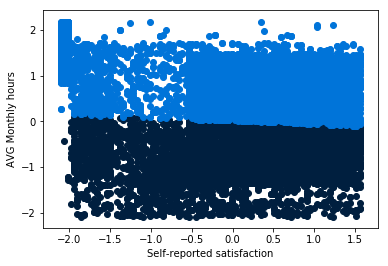

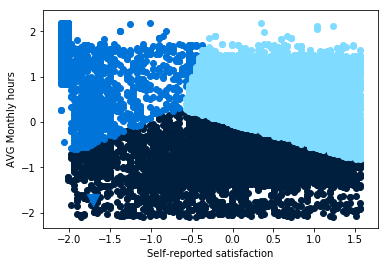

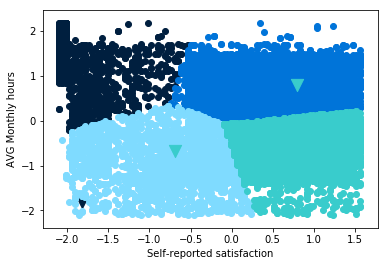

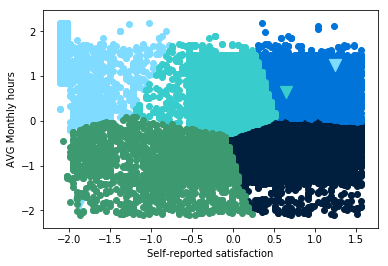

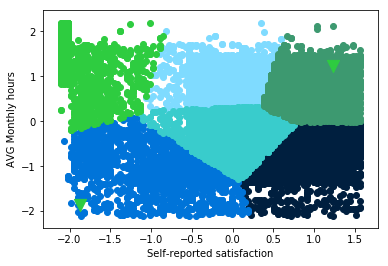

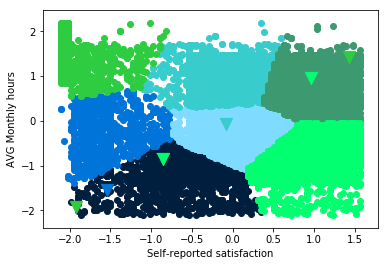

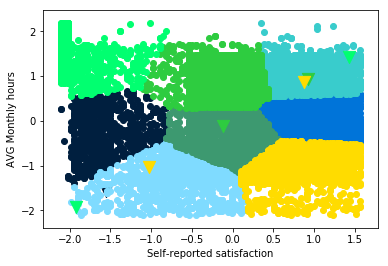

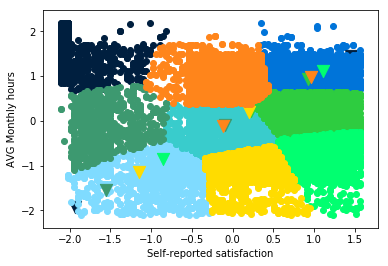

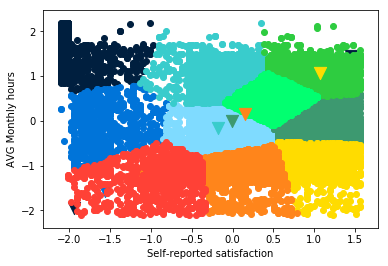

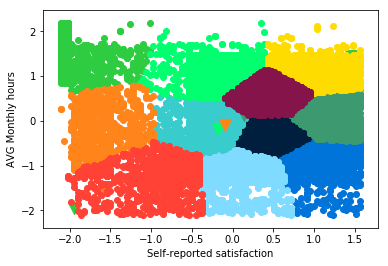

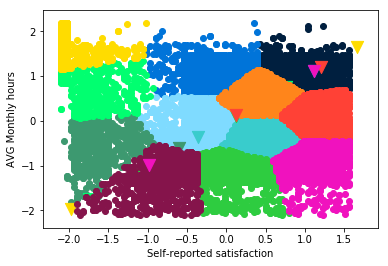

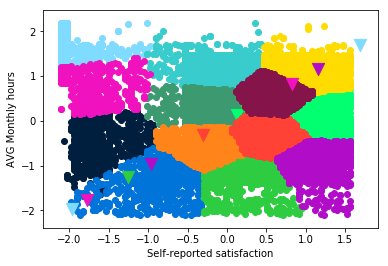

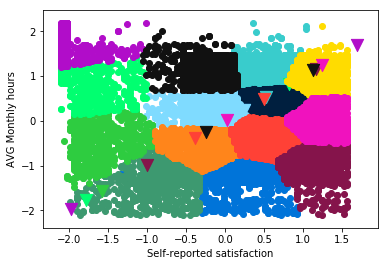

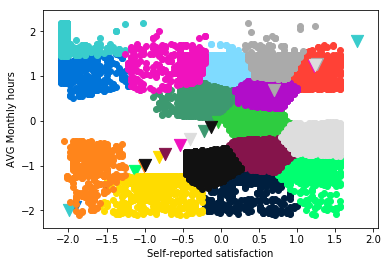

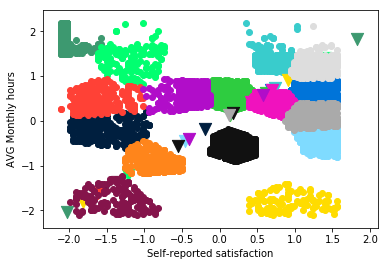

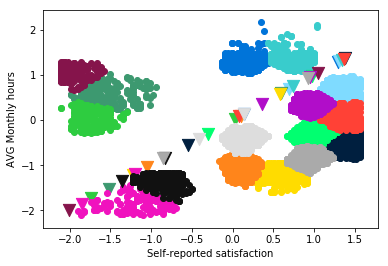

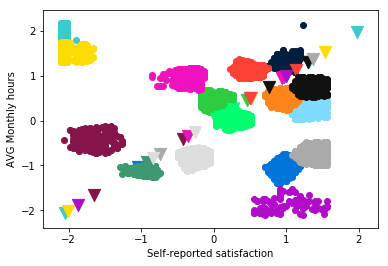

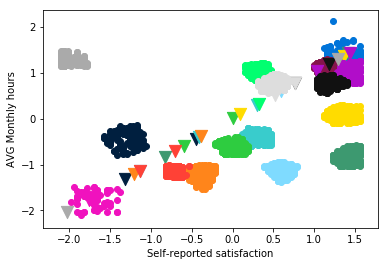

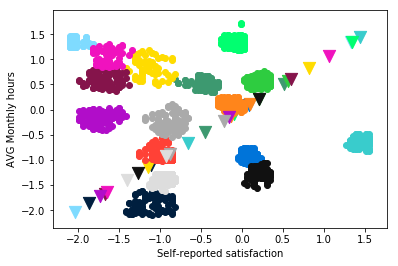

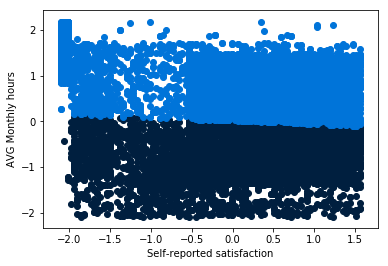

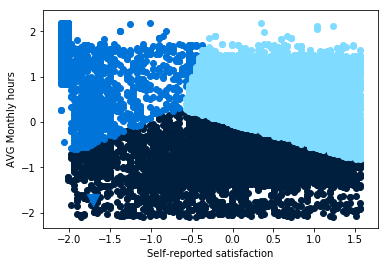

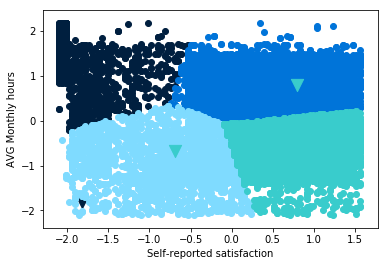

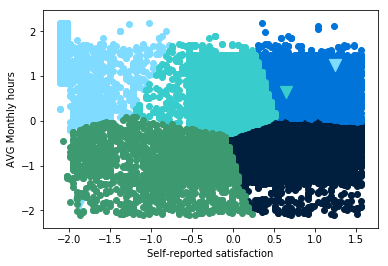

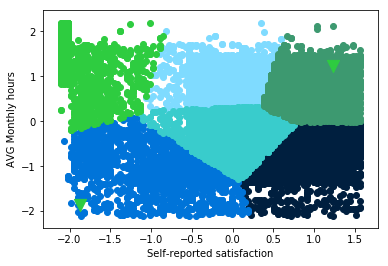

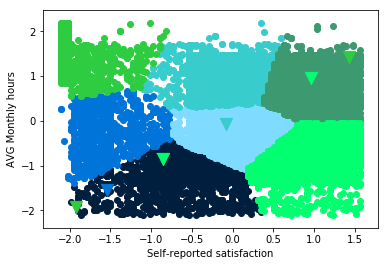

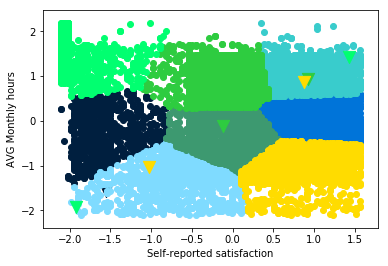

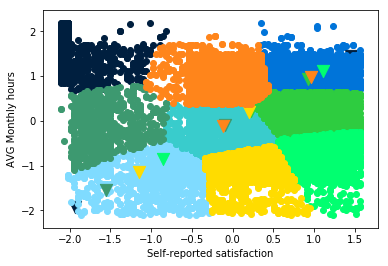

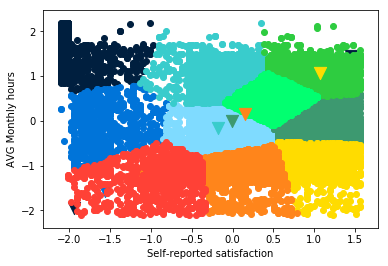

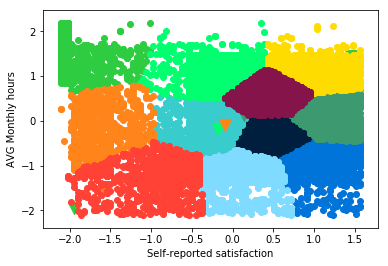

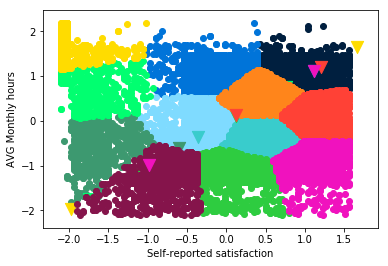

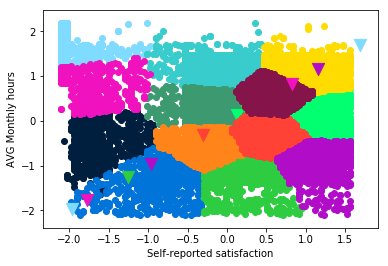

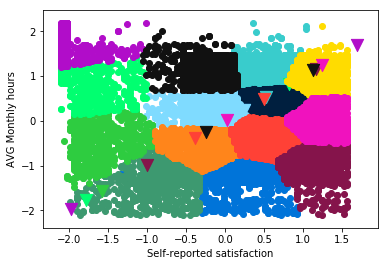

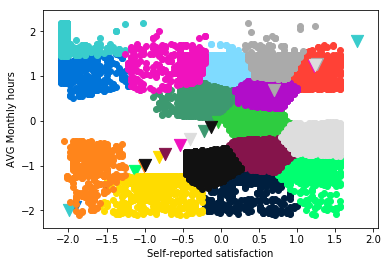

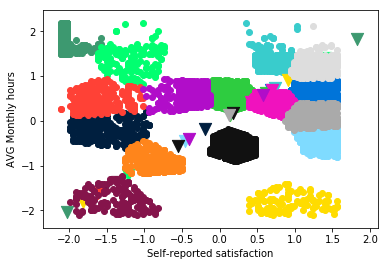

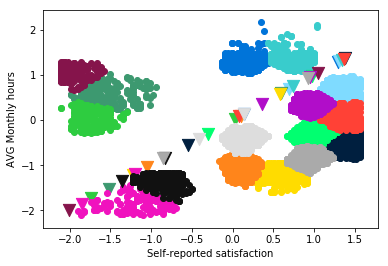

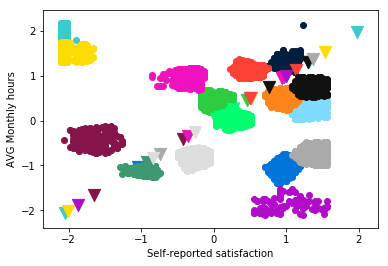

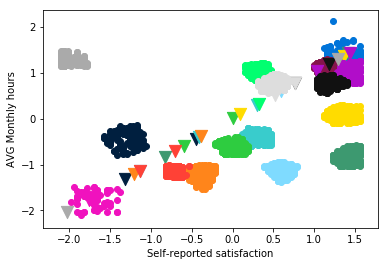

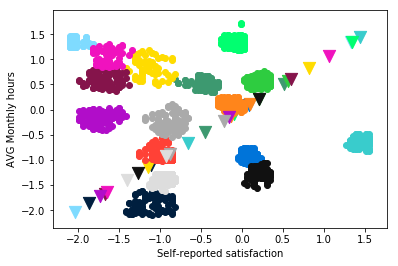

In [15]:
pp.show()

In [56]:
pp.cla()
pp.clf()
pp.close(figure)